<a href="https://colab.research.google.com/github/hoangtuNhat1/-Python-Forecasting-Principles-and-Practice-/blob/main/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install easyocr
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 50.7 MB/s eta 0:00:00


In [3]:
import gdown

# Replace 'FILE_ID' with the actual file ID from your Google Drive link
file_id = '1qqrAwLIByi8OACZtpj6MnbvB25I4SkoB'
gdown.download(f'https://drive.google.com/uc?id={file_id}', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1qqrAwLIByi8OACZtpj6MnbvB25I4SkoB
To: /content/Drill_and_Drill_N2-Bunpou.pdf
100%|██████████| 63.0M/63.0M [00:00<00:00, 81.5MB/s]


'Drill_and_Drill_N2-Bunpou.pdf'

In [4]:
# list them
!ls -l

total 61548
-rw-r--r-- 1 root root 63018798 Oct 15 08:20 Drill_and_Drill_N2-Bunpou.pdf
drwxr-xr-x 1 root root     4096 Oct 29 13:25 sample_data


In [6]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['ja','en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [7]:
import fitz  # PyMuPDF
import easyocr
from PIL import Image
import numpy as np
def pdf_to_images(pdf_path):
    """Converts PDF pages to images and returns them as a list of images."""
    images = []
    pdf_document = fitz.open(pdf_path)

    for page_num in range(pdf_document.page_count):
        page = pdf_document[page_num]

        # Render page to a high-resolution image (increase dpi for better quality if needed)
        pix = page.get_pixmap(dpi=300)

        # Convert to PIL Image format
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        images.append(img)

    pdf_document.close()
    return images

# def extract_text_from_pdf(pdf_path):
#     """Extracts text from each page of a PDF."""
#     images = pdf_to_images(pdf_path)
#     all_text = []

#     for img in images:
#         # Convert PIL Image to numpy array for EasyOCR
#         img_np = np.array(img)

#         # Perform OCR
#         result = reader.readtext(img_np)

#         # Collect text from each detected element
#         page_text = " ".join([text[1] for text in result])  # `text[1]` contains the text string
#         all_text.append(page_text)

#     return all_text

# # Example usage
# pdf_path = 'Drill_and_Drill_N2-Bunpou.pdf'  # Update this with the path to your PDF
# text = extract_text_from_pdf(pdf_path)

# # Display text from each page
# for i, page_text in enumerate(text, 1):
#     print(f"--- Page {i} ---")
#     print(page_text)
#     print()

In [8]:
pdf_path = 'Drill_and_Drill_N2-Bunpou.pdf'  # Update this with the path to your PDF
images = pdf_to_images(pdf_path)

In [37]:
image = images[79]

In [38]:
img_np = np.array(image)
text_data = reader.readtext(img_np)
# page_text = " ".join([text[1] for text in result])  # `text[1]` contains the text string
# all_text.append(page_text)

In [ ]:
text_data

In [14]:
print(page_text)

N 2 【56】 彼は親にもらったお金を 1年で使い ( ) しまいました。 1 ぬいて 2 かけて 3 きって 4 きれて 【57】年を取ったせいか最近志れ( )なって,人の名前が思い出せないことが多い。 1 がたく 2 っぽく 3 がちに 4 気味に 【58】 私が車で送りますから; 電車の時間を気にする ( 1 ことはありませんよ 2 わけがありませんよ 3 はずはありませんよ 4 ~  【59】 このケーキは; 本に書いてある ( )作れば 失敗することはないはずだ。 1 ところに 2 上に 3 とおりに 4 うちに 【60】 私の会社では 1 0年間働いたら; 1 週間休みがもらえる 1 ことだ 2 ものだ 3 ものではない ことになっている ~ 馨 1 喜 馨 l23 8 りるりませんえ " ~


In [19]:
!wget -O NotoSansJP-Regular.otf https://noto-website-2.storage.googleapis.com/pkgs/NotoSansJP-Regular.otf


--2024-10-31 04:39:58--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansJP-Regular.otf
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.141.207, 74.125.139.207, 173.194.212.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.141.207|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-10-31 04:39:58 ERROR 403: Forbidden.



In [24]:
font_path = '/content/NotoSansJP-Regular.otf'  # Path to the Japanese font

In [34]:
from PIL import Image, ImageDraw, ImageFont
def draw_text_on_blank_page(text_data, width, height, font_path, output_path):
    """Draws detected Japanese text onto a blank white image."""
    # Create a blank white image
    blank_image = Image.new('RGB', (width, height), 'white')
    draw = ImageDraw.Draw(blank_image)

    # Load the Japanese font
    font = ImageFont.truetype(font_path, size=40)

    for item in text_data:
        bbox, text, _ = item  # Get the bounding box and text
        # Calculate text position based on the bounding box's top-left corner
        text_position = (bbox[0][0], bbox[0][1])

        # Draw Japanese text on the blank image
        draw.text(text_position, text, fill="black", font=font)

    # Save the result image
    blank_image.save(output_path)
    print(f"Image saved to {output_path}")

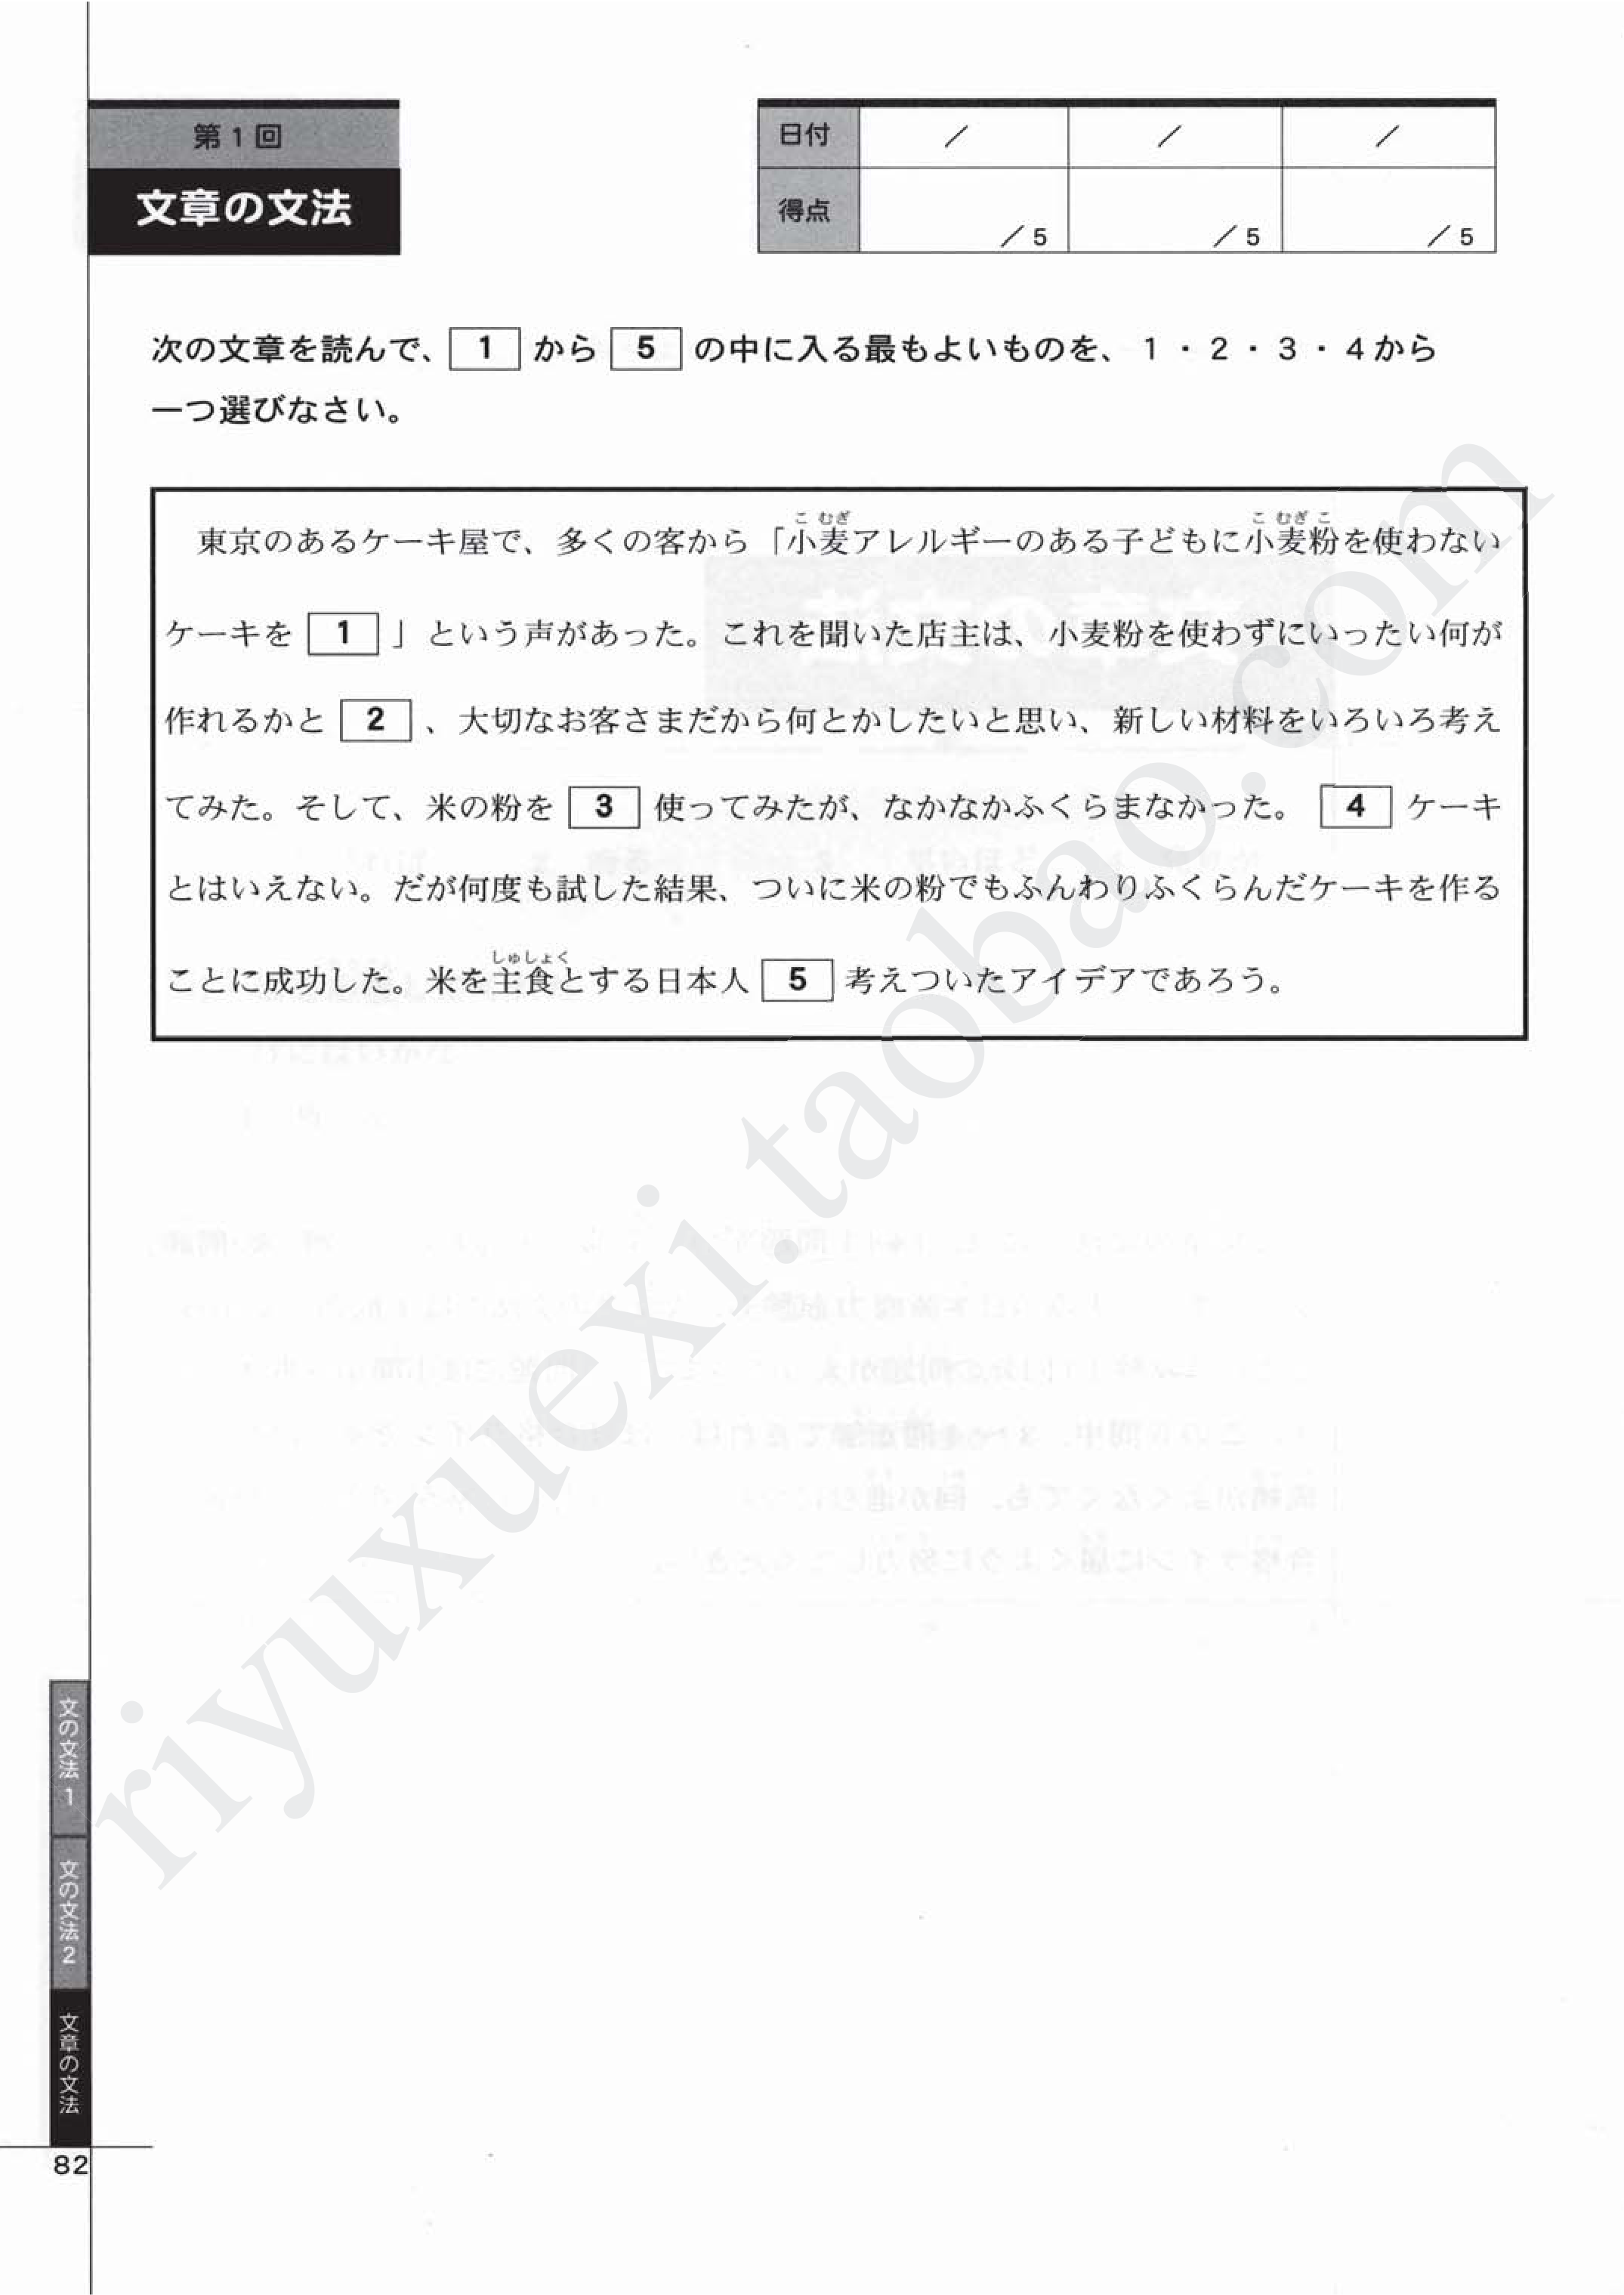

In [39]:
image

In [41]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.0 MB/s eta 0:00:00


In [42]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
def save_text_to_pdf(text_data, output_pdf_path, image_width, image_height):
    """Saves the detected text to a PDF."""
    c = canvas.Canvas(output_pdf_path, pagesize=(image_width, image_height))

    for item in text_data:
        bbox, text, _ = item  # Get the bounding box and text

        # Calculate text position based on the bounding box's top-left corner
        text_position = (bbox[0][0], image_height - bbox[0][1])  # Invert y-axis for PDF

        # Draw text on the PDF
        c.drawString(text_position[0], text_position[1], text)

    c.save()
    print(f"PDF saved to {output_pdf_path}")

In [40]:
output_path = 'image_with_text.jpg'  # Output image path
draw_text_on_blank_page(text_data, image.width, image.height, font_path, output_path)

Image saved to image_with_text.jpg


In [ ]:
output_pdf_path = 'image_with_text.pdf'
save_text_to_pdf(text_data, output_pdf_path, image.width, image.height)